In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Set parameters
m = 1.0   # mass (kg)
k = 50.0  # spring constant (N/m)
c = 2.0   # damping coefficient (N·s/m)

# Times of interest
t_start = 0.0
t_end = 2.0
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

In [2]:
F_max = 100.0  # maximum force in Newtons

def F(t):
    """
    Piecewise force:
    - 0 <= t < 0.5 : ramp from 0 to F_max
    - 0.5 <= t < 1.0 : constant F_max
    - t >= 1.0 : drops instantly back to 0
    """
    if t < 0.5:
        # Ramp up: fraction = t / 0.5
        return F_max * (t / 0.5)
    elif t < 1.0:
        return F_max
    else:
        return 0.0

In [3]:
def mass_spring_damper(t, y):
    """
    y[0] = x(t)   (displacement)
    y[1] = v(t)   (velocity)
    """
    x, v = y
    # Acceleration (2nd derivative of x)
    dxdt = v
    dvdt = (F(t) - c*v - k*x) / m
    return [dxdt, dvdt]

In [4]:
y0 = [0.0, 0.0]  # x(0) = 0, v(0) = 0

In [5]:
solution = solve_ivp(
    mass_spring_damper, 
    [t_start, t_end], 
    y0, 
    t_eval=t_eval, 
    rtol=1e-8, 
    atol=1e-8
)

x_vals = solution.y[0]
v_vals = solution.y[1]
time_vals = solution.t

In [6]:
# Evaluate F at the solution time points:
F_vals = np.array([F(ti) for ti in time_vals])

# Kinetic energy
KE_vals = 0.5 * m * v_vals**2

# Potential energy
PE_vals = 0.5 * k * x_vals**2

# Power (instantaneous)
power_vals = F_vals * v_vals

# Work done by the external force (cumulative integral of power)
# We can use numpy's cumulative trapezoid
from numpy import cumtrapz
work_vals = cumtrapz(power_vals, time_vals, initial=0.0)

ImportError: cannot import name 'cumtrapz' from 'numpy' (/opt/homebrew/Cellar/jupyterlab/4.0.8_1/libexec/lib/python3.12/site-packages/numpy/__init__.py)

NameError: name 'work_vals' is not defined

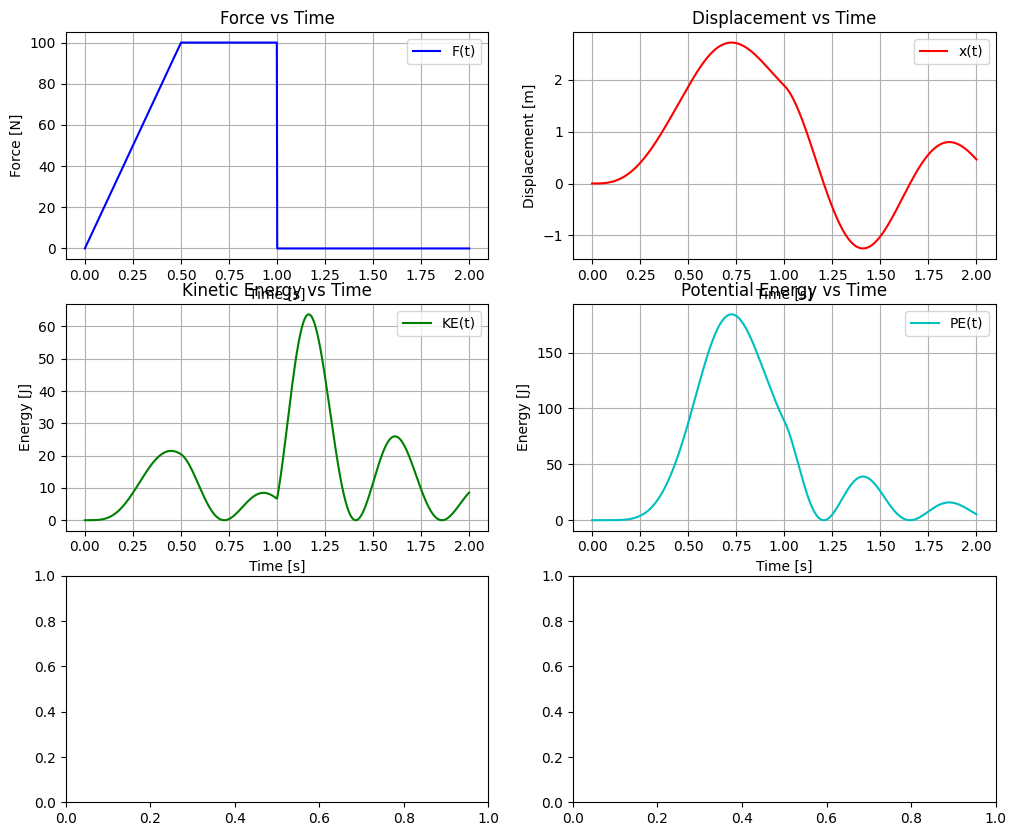

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

# 1. Force vs Time
axs[0].plot(time_vals, F_vals, 'b', label='F(t)')
axs[0].set_title('Force vs Time')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Force [N]')
axs[0].legend()
axs[0].grid(True)

# 2. Displacement vs Time
axs[1].plot(time_vals, x_vals, 'r', label='x(t)')
axs[1].set_title('Displacement vs Time')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Displacement [m]')
axs[1].legend()
axs[1].grid(True)

# 3. Kinetic Energy vs Time
axs[2].plot(time_vals, KE_vals, 'g', label='KE(t)')
axs[2].set_title('Kinetic Energy vs Time')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('Energy [J]')
axs[2].legend()
axs[2].grid(True)

# 4. Potential Energy vs Time
axs[3].plot(time_vals, PE_vals, 'c', label='PE(t)')
axs[3].set_title('Potential Energy vs Time')
axs[3].set_xlabel('Time [s]')
axs[3].set_ylabel('Energy [J]')
axs[3].legend()
axs[3].grid(True)

# 5. Work Done by the External Force vs Time
axs[4].plot(time_vals, work_vals, 'm', label='Work(t)')
axs[4].set_title('Work by External Force vs Time')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Work [J]')
axs[4].legend()
axs[4].grid(True)

# 6. Power vs Time
axs[5].plot(time_vals, power_vals, 'k', label='Power(t)')
axs[5].set_title('Power Input vs Time')
axs[5].set_xlabel('Time [s]')
axs[5].set_ylabel('Power [W]')
axs[5].legend()
axs[5].grid(True)

plt.tight_layout()
plt.show()